In [1]:
import seaborn as sns
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy import stats

In [3]:
import os

In [4]:
from scvi_colab import install
install(run_outside_colab=True)


INFO     scvi-colab: Installing scvi-tools.                                                                        
INFO     scvi-colab: Install successful. Testing import.                                                           


C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scvi\_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scvi\_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import torch

In [5]:
import scvi

C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scvi\_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scvi\_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

Global seed set to 0


Last run with scvi-tools version: 1.0.4


# save cleaned anndata and meta data file

In [3]:
meta_clinical = pd.read_csv('../ROSMAP/metadata/ROSMAP_clinical.csv')

In [4]:
meta_clinical.head()

projid Study  msex  educ  race  spanish  apoe_genotype age_at_visit_max   
0  10101589   ROS   1.0  20.0   1.0      2.0           34.0              90+  \
1  86767530   MAP   0.0  10.0   1.0      2.0           33.0              90+   
2   9650662   MAP   0.0  15.0   1.0      2.0           23.0              90+   
3  50402855   MAP   0.0  21.0   1.0      2.0           33.0              90+   
4  20544321   ROS   0.0  16.0   1.0      2.0           23.0              90+   

  age_first_ad_dx age_death  cts_mmse30_first_ad_dx  cts_mmse30_lv       pmi   
0             90+       90+                    18.0            5.0  9.916667  \
1             90+       90+                    18.0           10.0  6.500000   
2             90+       90+                     0.0            0.0  3.850000   
3             NaN       NaN                     NaN           27.0       NaN   
4             90+       NaN                    13.0           14.0       NaN   

   braaksc  ceradsc  cogdx  dcfdx_lv individualID  
0      4.0      2.0    4.0       4.0     R6939144  
1      4.0      2.0    4.0       4.0     R3893503  
2      3.0      2.0    4.0       4.0     R8937093  
3      NaN      NaN    NaN       1.0     R7139444  
4      NaN      NaN    NaN       4.0     R4971237

In [16]:
filtered_col = pd.read_csv('../ROSMAP/filtered_column_metadata.txt',sep='\t')
filtered_genes = pd.read_csv('../ROSMAP/filtered_gene_row_names.txt',sep='\t',header=None)

In [17]:
filtered_mtx = sc.read_mtx('../ROSMAP/filtered_count_matrix.mtx',dtype='float32')

In [7]:
filtered_col.head()

TAG    projid      tsne1      tsne2  pre.cluster   
0  AAACGGGAGATCCCGC.1  11409232  18.076541  43.899396           15  \
1  AAATGCCTCCAATGGT.1  11409232   8.130535  20.687424            3   
2  AACCATGTCAGTGCAT.1  11409232  17.088242  47.272289           15   
3  AACCATGTCTGTACGA.1  11409232  15.482062  23.718378            3   
4  AACCGCGTCCGCATAA.1  11409232  28.993102  16.223905            2   

  broad.cell.type Subcluster  
0              Ex        Ex8  
1              Ex        Ex0  
2              Ex        Ex8  
3              Ex        Ex0  
4              Ex        Ex0

In [8]:
filtered_col.shape

(70634, 7)

In [9]:
filtered_genes.shape

(17926, 1)

In [10]:
filtered_genes.head()

0
0  FO538757.2
1      SAMD11
2       NOC2L
3      KLHL17
4     PLEKHN1

In [11]:
filtered_mtx

AnnData object with n_obs × n_vars = 17926 × 70634

In [18]:
filtered_mtx = filtered_mtx.T

In [13]:
filtered_mtx

AnnData object with n_obs × n_vars = 70634 × 17926

In [14]:
filtered_mtx.X

<70634x17926 sparse matrix of type '<class 'numpy.float32'>'
	with 119696200 stored elements in Compressed Sparse Column format>

In [19]:
filtered_mtx.obs = filtered_col

In [20]:
filtered_mtx.var = filtered_genes

In [21]:
filtered_mtx.var = filtered_mtx.var.rename(columns={0:'gene_name'})

In [24]:
filtered_mtx

AnnData object with n_obs × n_vars = 70634 × 17926
    obs: 'TAG', 'projid', 'pre.cluster', 'broad.cell.type', 'Subcluster'
    var: 'gene_name'
    obsm: 'tsne'

In [22]:
filtered_mtx.obsm['tsne'] = filtered_col[['tsne1','tsne2']]

In [23]:
filtered_mtx.obs.drop(columns=['tsne1','tsne2'],inplace=True)

In [29]:
sample_id = filtered_col.projid.unique()

In [34]:
meta_rnaseq = meta_clinical[meta_clinical.projid.isin(sample_id)].copy()

In [35]:
meta_rnaseq

projid Study  msex  educ  race  spanish  apoe_genotype   
25    20104101   ROS   0.0  18.0   1.0      2.0           23.0  \
272   20207013   ROS   0.0  23.0   1.0      2.0           23.0   
282   20170043   ROS   0.0  24.0   1.0      2.0           33.0   
616   20977678   ROS   0.0  16.0   1.0      2.0           23.0   
648   20149910   ROS   0.0  18.0   1.0      2.0           23.0   
688   20173942   ROS   0.0  21.0   1.0      2.0           34.0   
756   21189544   ROS   0.0  18.0   1.0      2.0           23.0   
815   20261901   ROS   0.0  20.0   1.0      2.0           33.0   
818   21135554   ROS   0.0  21.0   1.0      2.0           33.0   
860   21126823   ROS   0.0  18.0   1.0      2.0           33.0   
886   21412626   ROS   0.0  24.0   1.0      2.0           23.0   
1173  11342432   ROS   1.0  21.0   1.0      2.0           33.0   
1317  10101327   ROS   1.0  21.0   1.0      2.0           33.0   
1440  11336574   ROS   1.0  22.0   1.0      2.0           34.0   
1446  21142003   ROS   0.0  16.0   1.0      2.0           23.0   
1461  10248033   ROS   1.0  19.0   1.0      2.0           44.0   
1537  10260309   ROS   1.0  18.0   2.0      2.0           34.0   
1649  20275399   ROS   0.0  18.0   1.0      2.0           33.0   
1656  11345331   ROS   1.0  19.0   1.0      2.0           33.0   
1685  11072071   ROS   1.0  18.0   1.0      2.0           33.0   
1691  20978133   ROS   0.0  18.0   1.0      2.0           33.0   
1793  20249897   ROS   0.0  18.0   1.0      2.0           33.0   
1809  11159965   ROS   1.0  24.0   1.0      2.0           23.0   
1932  11399871   ROS   1.0  16.0   1.0      2.0           23.0   
1943  11302830   ROS   1.0  23.0   1.0      2.0           34.0   
1978  10222853   ROS   1.0  20.0   1.0      2.0           34.0   
2029  11399321   ROS   1.0  23.0   1.0      2.0           23.0   
2057  11609672   ROS   1.0  10.0   1.0      1.0           34.0   
2087  10536568   ROS   1.0  19.0   1.0      2.0           33.0   
2283  20179164   ROS   0.0  16.0   1.0      2.0           33.0   
2299  20963866   ROS   0.0  21.0   1.0      2.0           44.0   
2340  11200645   ROS   1.0  16.0   1.0      2.0           33.0   
2433  10101291   ROS   1.0  15.0   1.0      2.0           23.0   
2506  21159840   ROS   0.0  16.0   1.0      2.0           44.0   
2617  20254740   ROS   0.0  21.0   1.0      2.0           33.0   
2622  76647134   ROS   0.0  20.0   1.0      2.0            NaN   
2634  10290265   ROS   1.0  18.0   1.0      2.0           33.0   
2732  10261026   ROS   1.0  25.0   1.0      2.0           33.0   
2751  20282398   ROS   0.0  18.0   1.0      2.0           34.0   
2791  11310718   ROS   1.0  21.0   1.0      2.0           33.0   
2793  11409232   ROS   1.0  22.0   1.0      2.0           33.0   
2816  10102206   ROS   1.0  12.0   1.0      2.0           33.0   
2892  11630705   ROS   1.0  15.0   2.0      2.0           44.0   
2920  20956867   ROS   0.0  18.0   1.0      2.0           33.0   
3011  10514454   ROS   1.0  18.0   1.0      2.0           33.0   
3166  10288185   ROS   1.0  15.0   1.0      1.0           33.0   
3200  21172121   ROS   0.0  18.0   1.0      2.0           34.0   
3285  20112377   ROS   0.0  16.0   1.0      2.0           34.0   

        age_at_visit_max     age_first_ad_dx           age_death   
25                   90+                 90+                 90+  \
272                  90+                 NaN                 90+   
282                  90+  83.723477070499655                 90+   
616                  90+                 NaN                 90+   
648                  90+                 NaN                 90+   
688                  90+                 NaN                 90+   
756                  90+   86.92402464065708                 90+   
815                  90+                 90+                 90+   
818                  90+                 90+                 90+   
860                  90+                 NaN                 90+   
886                  90+ 

In [36]:
meta_rnaseq.msex.value_counts() #sample balance on sex

msex
0.0    24
1.0    24
Name: count, dtype: int64

In [38]:
meta_rnaseq.race.value_counts() #sample focus on white

race
1.0    46
2.0     2
Name: count, dtype: int64

In [39]:
meta_rnaseq.spanish.value_counts() #sample mostly no spanish

spanish
2.0    46
1.0     2
Name: count, dtype: int64

In [40]:
meta_rnaseq.apoe_genotype.value_counts()

apoe_genotype
33.0    23
23.0    11
34.0     9
44.0     4
Name: count, dtype: int64

In [41]:
meta_rnaseq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 25 to 3285
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   projid                  48 non-null     int64  
 1   Study                   48 non-null     object 
 2   msex                    48 non-null     float64
 3   educ                    48 non-null     float64
 4   race                    48 non-null     float64
 5   spanish                 48 non-null     float64
 6   apoe_genotype           47 non-null     float64
 7   age_at_visit_max        48 non-null     object 
 8   age_first_ad_dx         17 non-null     object 
 9   age_death               48 non-null     object 
 10  cts_mmse30_first_ad_dx  17 non-null     float64
 11  cts_mmse30_lv           48 non-null     float64
 12  pmi                     47 non-null     float64
 13  braaksc                 48 non-null     float64
 14  ceradsc                 48 non-null     float6

In [43]:
meta_rnaseq['age_at_visit_max'] = meta_rnaseq['age_at_visit_max'].astype(str).str.replace('+', '').astype('float')
meta_rnaseq['age_first_ad_dx'] = meta_rnaseq['age_first_ad_dx'].astype(str).str.replace('+', '').astype('float')
meta_rnaseq['age_death'] = meta_rnaseq['age_death'].astype(str).str.replace('+', '').astype('float')

<Axes: xlabel='braaksc', ylabel='age_death'>

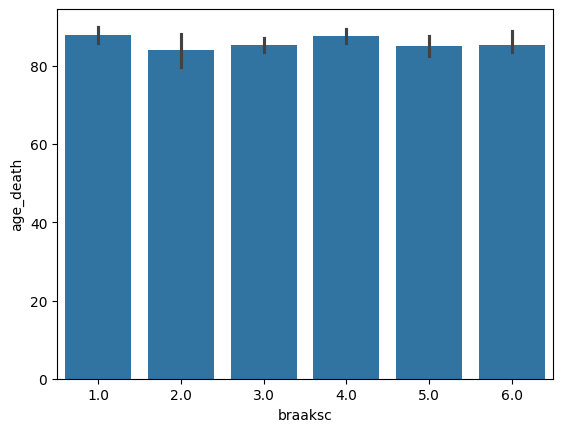

In [44]:
sns.barplot(meta_rnaseq,x='braaksc',y='age_death')

<Axes: xlabel='ceradsc', ylabel='age_death'>

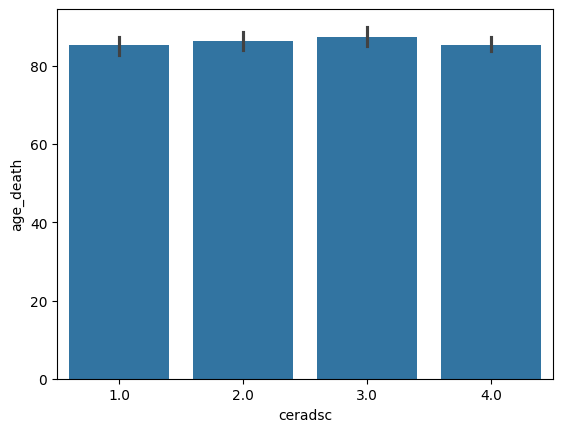

In [45]:
sns.barplot(meta_rnaseq,x='ceradsc',y='age_death')

<Axes: xlabel='braaksc', ylabel='cts_mmse30_lv'>

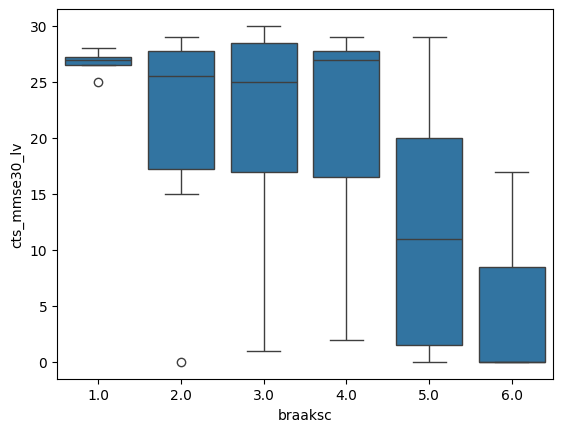

In [50]:
sns.boxplot(meta_rnaseq,x='braaksc',y='cts_mmse30_lv')

<Axes: xlabel='ceradsc', ylabel='cts_mmse30_lv'>

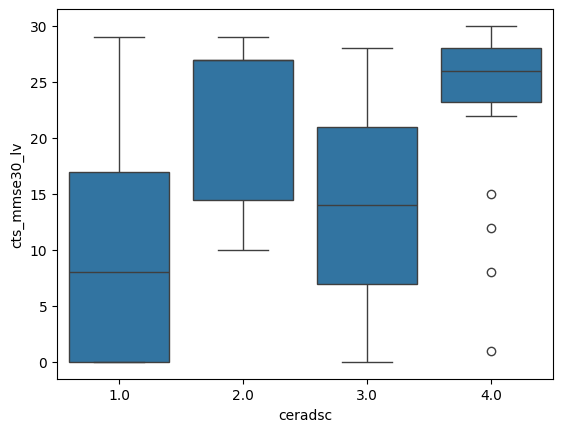

In [49]:
sns.boxplot(meta_rnaseq,x='ceradsc',y='cts_mmse30_lv')

<Axes: xlabel='braaksc', ylabel='cogdx'>

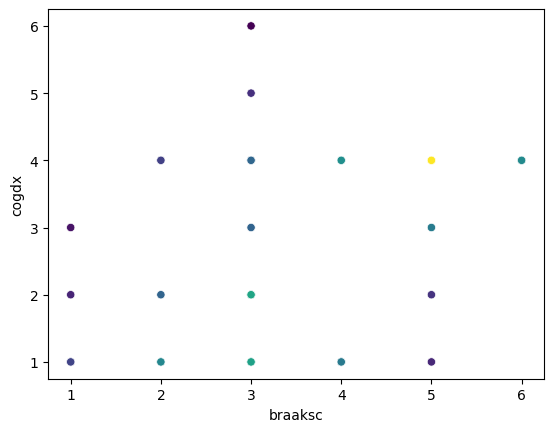

In [57]:
values = np.vstack([meta_rnaseq["braaksc"], meta_rnaseq["cogdx"]])
kernel = stats.gaussian_kde(values)(values)
sns.scatterplot(data=meta_rnaseq,x='braaksc',y='cogdx',c=kernel,cmap="viridis")

<Axes: xlabel='braaksc', ylabel='cogdx'>

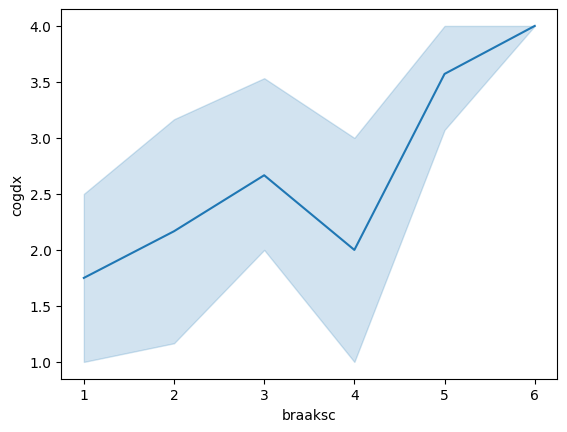

In [58]:
sns.lineplot(data=meta_rnaseq,x='braaksc',y='cogdx')

<Axes: xlabel='ceradsc', ylabel='cogdx'>

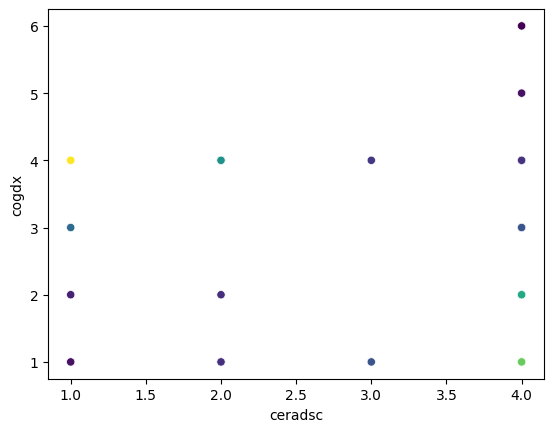

In [59]:
values = np.vstack([meta_rnaseq["ceradsc"], meta_rnaseq["cogdx"]])
kernel = stats.gaussian_kde(values)(values)
sns.scatterplot(data=meta_rnaseq,x='ceradsc',y='cogdx',c=kernel,cmap="viridis")

<Axes: xlabel='ceradsc', ylabel='cogdx'>

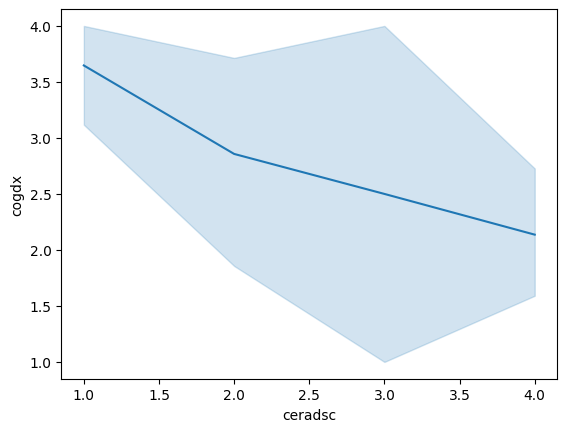

In [60]:
sns.lineplot(data=meta_rnaseq,x='ceradsc',y='cogdx')

<Axes: xlabel='braaksc', ylabel='dcfdx_lv'>

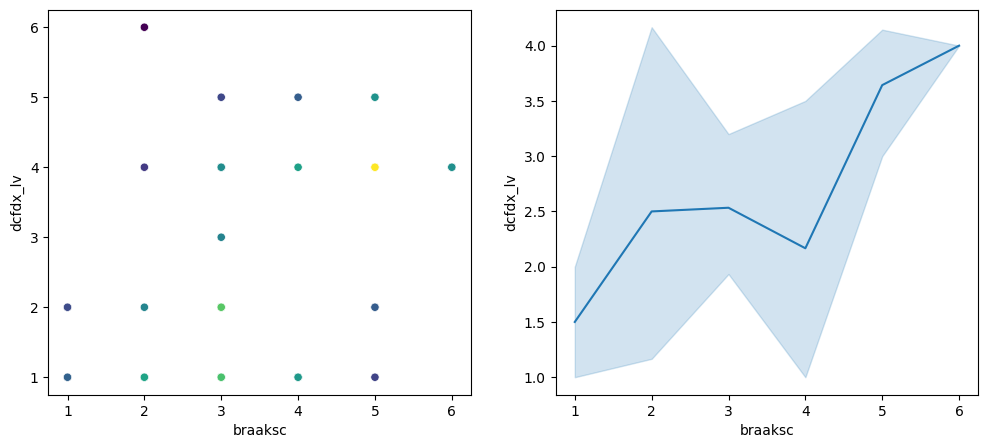

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))
values = np.vstack([meta_rnaseq["braaksc"], meta_rnaseq["dcfdx_lv"]])
kernel = stats.gaussian_kde(values)(values)
sns.scatterplot(data=meta_rnaseq,x='braaksc',y='dcfdx_lv',c=kernel,cmap="viridis",ax=ax1)
sns.lineplot(data=meta_rnaseq,x='braaksc',y='dcfdx_lv',ax=ax2)

<Axes: xlabel='ceradsc', ylabel='dcfdx_lv'>

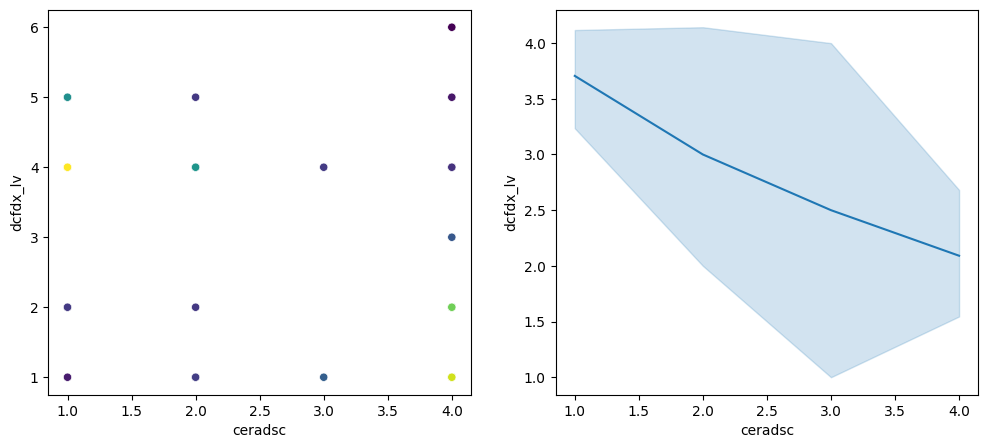

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))
values = np.vstack([meta_rnaseq["ceradsc"], meta_rnaseq["dcfdx_lv"]])
kernel = stats.gaussian_kde(values)(values)
sns.scatterplot(data=meta_rnaseq,x='ceradsc',y='dcfdx_lv',c=kernel,cmap="viridis",ax=ax1)
sns.lineplot(data=meta_rnaseq,x='ceradsc',y='dcfdx_lv',ax=ax2)

In [82]:
meta_rnaseq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 25 to 3285
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   projid                  48 non-null     int64  
 1   Study                   48 non-null     object 
 2   msex                    48 non-null     float64
 3   educ                    48 non-null     float64
 4   race                    48 non-null     float64
 5   spanish                 48 non-null     float64
 6   apoe_genotype           47 non-null     float64
 7   age_at_visit_max        48 non-null     float64
 8   age_first_ad_dx         17 non-null     float64
 9   age_death               48 non-null     float64
 10  cts_mmse30_first_ad_dx  17 non-null     float64
 11  cts_mmse30_lv           48 non-null     float64
 12  pmi                     47 non-null     float64
 13  braaksc                 48 non-null     float64
 14  ceradsc                 48 non-null     float6

In [83]:
ad_col = ['msex','age_at_visit_max','age_death','cts_mmse30_lv','braaksc','ceradsc','cogdx','dcfdx_lv']

In [84]:
meta_rnaseq[ad_col].corr()

msex  age_at_visit_max  age_death  cts_mmse30_lv   
msex              1.000000         -0.207369  -0.164532       0.178987  \
age_at_visit_max -0.207369          1.000000   0.954477      -0.249231   
age_death        -0.164532          0.954477   1.000000      -0.183175   
cts_mmse30_lv     0.178987         -0.249231  -0.183175       1.000000   
braaksc          -0.134358         -0.070807  -0.047263      -0.473066   
ceradsc           0.045776          0.060838  -0.013129       0.501791   
cogdx            -0.206329          0.076497   0.026274      -0.714721   
dcfdx_lv         -0.153266          0.099718   0.045682      -0.729902   

                   braaksc   ceradsc     cogdx  dcfdx_lv  
msex             -0.134358  0.045776 -0.206329 -0.153266  
age_at_visit_max -0.070807  0.060838  0.076497  0.099718  
age_death        -0.047263 -0.013129  0.026274  0.045682  
cts_mmse30_lv    -0.473066  0.501791 -0.714721 -0.729902  
braaksc           1.000000 -0.782013  0.422871  0.423709  
ceradsc          -0.782013  1.000000 -0.474497 -0.485376  
cogdx             0.422871 -0.474497  1.000000  0.947467  
dcfdx_lv          0.423709 -0.485376  0.947467  1.000000

<Axes: xlabel='ceradsc', ylabel='braaksc'>

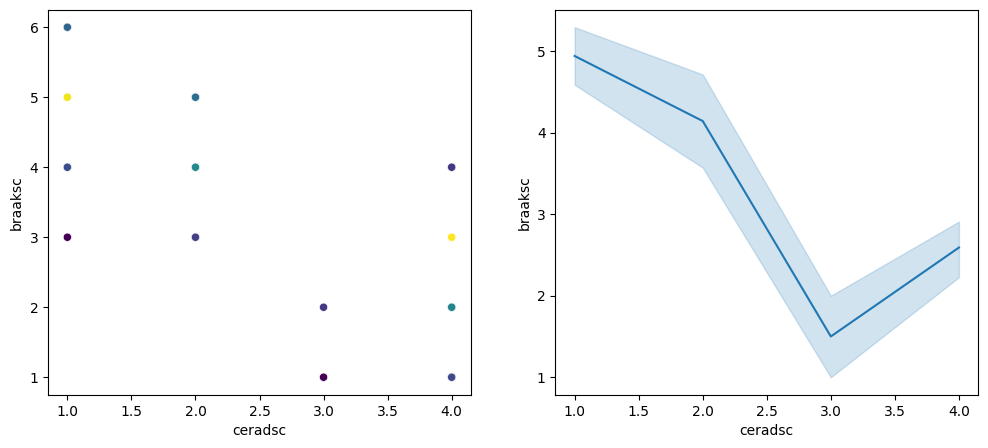

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))
values = np.vstack([meta_rnaseq["ceradsc"], meta_rnaseq["braaksc"]])
kernel = stats.gaussian_kde(values)(values)
sns.scatterplot(data=meta_rnaseq,x='ceradsc',y='braaksc',c=kernel,cmap="viridis",ax=ax1)
sns.lineplot(data=meta_rnaseq,x='ceradsc',y='braaksc',ax=ax2)

### braaksc and ceradsc are correlated with coef~-0.8
### cogdx and dcfdx_lv are highly correlated (0.95)
### cogdx/dcfdx_lv are correlated with braaksc/ceradsc with coef ~+-0.45
### cts_mmse30_lv is correlated with cogdx/dcfdx_lv with coef~ -0.7, correlated with braaksc/ceradsc with coef~ +-0.5
### no obvious corr with age and sex

In [88]:
os.makedirs('../cleaned_file', exist_ok=True) 
meta_rnaseq.to_csv('../cleaned_file/meta_rnaseq.csv')

In [ ]:
filtered_mtx.obs_names = [f"Cell_{i:d}" for i in range(filtered_mtx.n_obs)]
filtered_mtx.var_names = [f"Gene_{i:d}" for i in range(filtered_mtx.n_vars)]

In [52]:
filtered_mtx.write("../cleaned_file/filtered_mtx.h5ad", compression="gzip")

# quality checking

In [7]:
meta_rnaseq=pd.read_csv('../cleaned_file/meta_rnaseq.csv',index_col=0)

In [8]:
meta_rnaseq.head()

projid Study  msex  educ  race  spanish  apoe_genotype   
25   20104101   ROS   0.0  18.0   1.0      2.0           23.0  \
272  20207013   ROS   0.0  23.0   1.0      2.0           23.0   
282  20170043   ROS   0.0  24.0   1.0      2.0           33.0   
616  20977678   ROS   0.0  16.0   1.0      2.0           23.0   
648  20149910   ROS   0.0  18.0   1.0      2.0           23.0   

     age_at_visit_max  age_first_ad_dx  age_death  cts_mmse30_first_ad_dx   
25               90.0        90.000000       90.0                    25.0  \
272              90.0              NaN       90.0                     NaN   
282              90.0        83.723477       90.0                    27.0   
616              90.0              NaN       90.0                     NaN   
648              90.0              NaN       90.0                     NaN   

     cts_mmse30_lv       pmi  braaksc  ceradsc  cogdx  dcfdx_lv individualID  
25             0.0  4.500000      2.0      3.0    4.0       4.0     R4567280  
272           27.0  4.166667      1.0      4.0    1.0       1.0     R2880377  
282            0.0  4.250000      5.0      1.0    4.0       4.0     R9094222  
616            1.0  3.916667      3.0      4.0    2.0       2.0     R9113571  
648           27.0  3.250000      4.0      4.0    1.0       1.0     R3405776

In [9]:
filtered_mtx = sc.read_h5ad('../cleaned_file/filtered_mtx.h5ad')

In [57]:
del filtered_mtx_t

In [106]:
filtered_mtx.var[filtered_mtx.var.gene_name.str.startswith('MT')].shape

(82, 1)

In [58]:
filtered_mtx.var['mt'] = filtered_mtx.var.gene_name.str.startswith('MT')

In [59]:
sc.pp.calculate_qc_metrics(
    filtered_mtx, qc_vars=["mt"], inplace=True, percent_top=[100]
)

In [60]:
filtered_mtx

AnnData object with n_obs × n_vars = 70634 × 17926
    obs: 'TAG', 'projid', 'pre.cluster', 'broad.cell.type', 'Subcluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_100_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'tsne'

<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

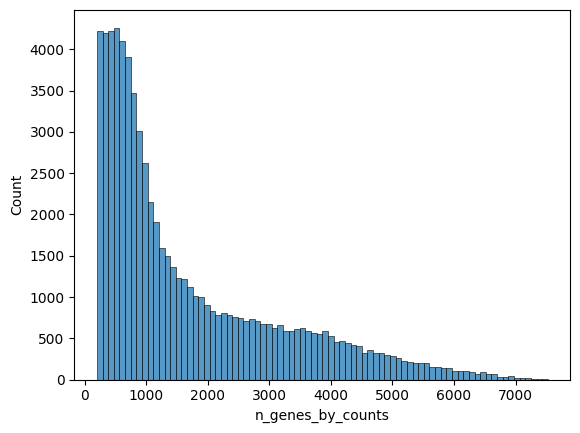

In [110]:
sns.histplot(filtered_mtx.obs, x='n_genes_by_counts')

In [111]:
filtered_mtx.obs['n_genes_by_counts'].describe()

count    70634.000000
mean      1694.597503
std       1479.018656
min        201.000000
25%        584.000000
50%       1078.000000
75%       2487.000000
max       7525.000000
Name: n_genes_by_counts, dtype: float64

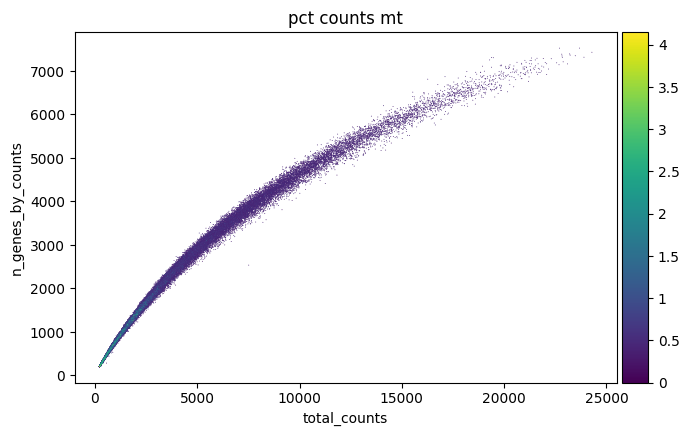

In [114]:
sc.pl.scatter(filtered_mtx, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

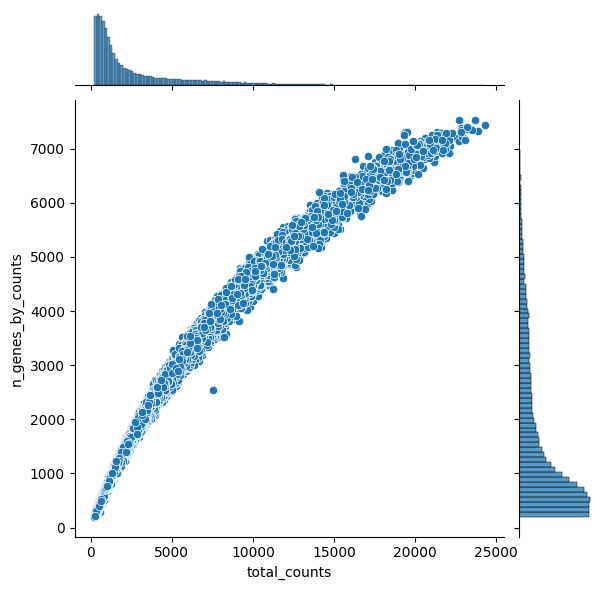

In [117]:
sns.jointplot(filtered_mtx.obs, x='total_counts',y='n_genes_by_counts')

### two points look like a outlier based on gene counts

In [119]:

filtered_mtx.obs[(filtered_mtx.obs['total_counts']>7000) & (filtered_mtx.obs['n_genes_by_counts']<3000)]

TAG    projid  pre.cluster broad.cell.type Subcluster   
63461  TAGTTGGTCTGAGGGA.22  76647134           13             Mic       Mic0  \

       n_genes_by_counts  log1p_n_genes_by_counts  total_counts   
63461               2535                 7.838343        7515.0  \

       log1p_total_counts  pct_counts_in_top_50_genes   
63461            8.924789                   15.222888  \

       pct_counts_in_top_100_genes  pct_counts_in_top_200_genes   
63461                    24.497671                    36.939454  \

       pct_counts_in_top_500_genes  total_counts_mt  log1p_total_counts_mt   
63461                    58.868929             29.0               3.401197  \

       pct_counts_mt  
63461       0.385895

In [120]:
filtered_mtx.obs['total_counts'].describe()

count    70634.000000
mean      3028.876465
std       3510.269043
min        206.000000
25%        727.000000
50%       1474.000000
75%       4077.000000
max      24290.000000
Name: total_counts, dtype: float64

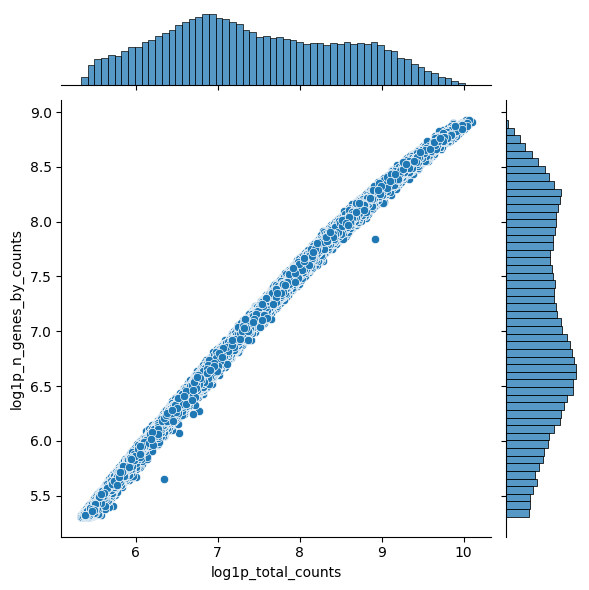

In [121]:
sns.jointplot(filtered_mtx.obs, x='log1p_total_counts',y='log1p_n_genes_by_counts')

In [122]:
filtered_mtx.obs[(filtered_mtx.obs['log1p_total_counts']>6.3) & (filtered_mtx.obs['log1p_n_genes_by_counts']<5.75)]

TAG    projid  pre.cluster broad.cell.type Subcluster   
17578  GACGGCTTCGGATGTT.23  20179164            2              Ex        Ex8  \

       n_genes_by_counts  log1p_n_genes_by_counts  total_counts   
17578                283                 5.648974         567.0  \

       log1p_total_counts  pct_counts_in_top_50_genes   
17578            6.342122                   57.319224  \

       pct_counts_in_top_100_genes  pct_counts_in_top_200_genes   
17578                    67.724868                    85.361552  \

       pct_counts_in_top_500_genes  total_counts_mt  log1p_total_counts_mt   
17578                        100.0              0.0                    0.0  \

       pct_counts_mt  
17578            0.0

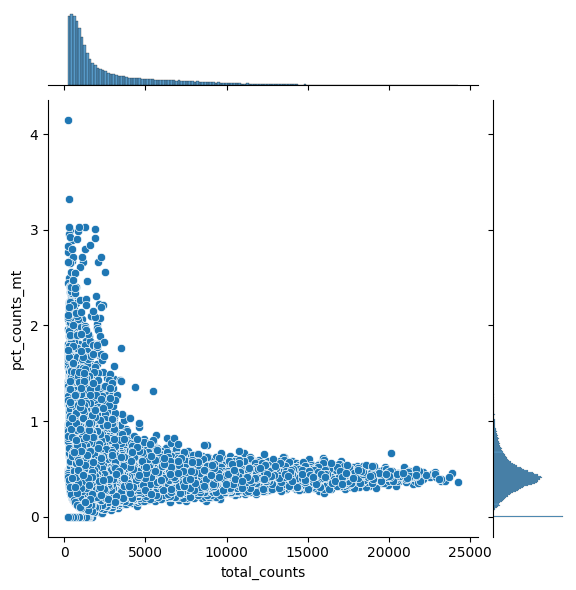

In [123]:
sns.jointplot(filtered_mtx.obs, x='total_counts',y='pct_counts_mt')

C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scanpy\plotting\_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


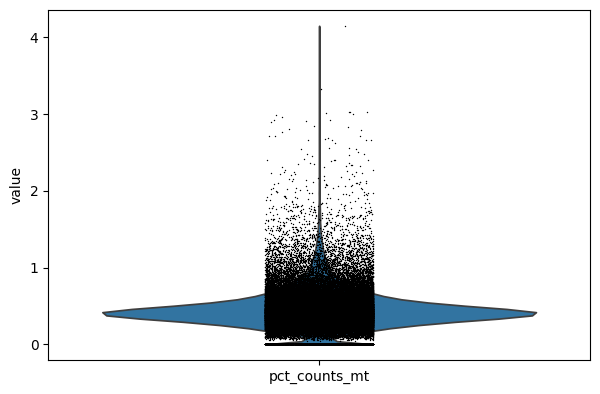

In [124]:
sc.pl.violin(filtered_mtx, "pct_counts_mt")

### look at number of cells(barcodes) measured for each donor

<Axes: >

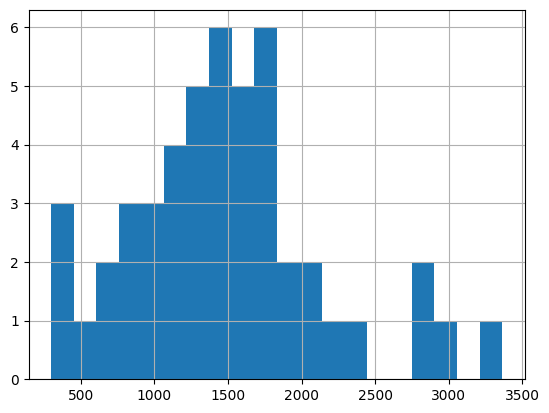

In [134]:
filtered_mtx.obs.projid.value_counts().hist(bins=20)

# dimension reduction

<Axes: xlabel='tsne1', ylabel='tsne2'>

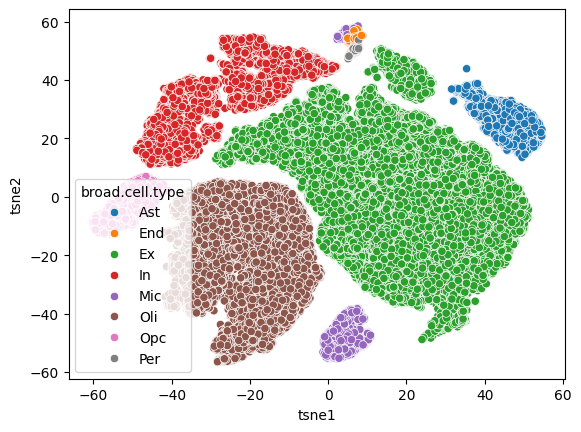

In [61]:
sns.scatterplot(filtered_mtx.obsm['tsne'],x='tsne1',y='tsne2',hue=filtered_mtx.obs['broad.cell.type'],legend='brief')


In [145]:
np.sort(filtered_mtx.obs['pre.cluster'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       19, 20, 21], dtype=int64)

In [146]:
filtered_mtx.obs['broad.cell.type'].value_counts()

broad.cell.type
Ex     34976
Oli    18235
In      9196
Ast     3392
Opc     2627
Mic     1920
Per      167
End      121
Name: count, dtype: int64

In [149]:
filtered_mtx.obs['Subcluster'].nunique()

44

<Axes: xlabel='tsne1', ylabel='tsne2'>

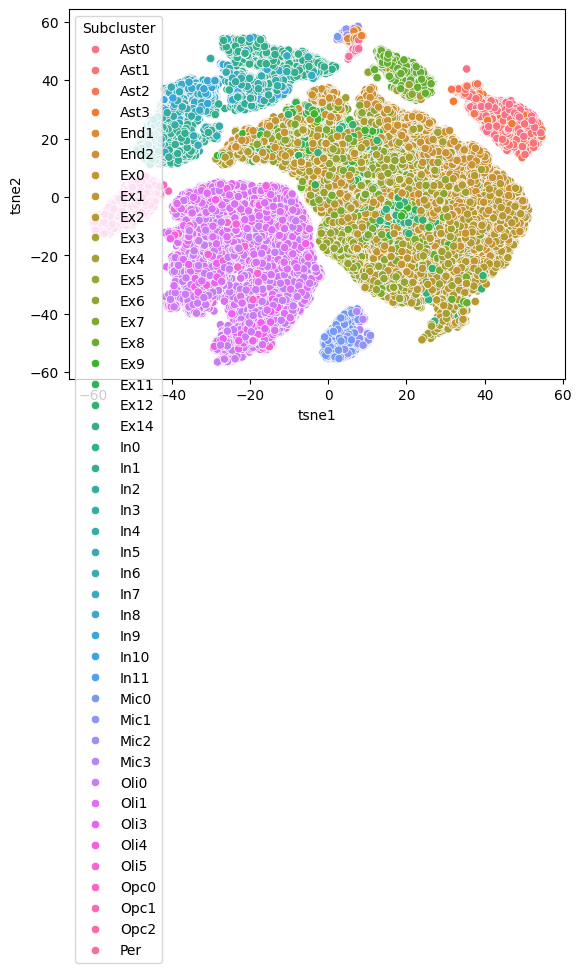

In [156]:
sns.scatterplot(filtered_mtx.obsm['tsne'],x='tsne1',y='tsne2',hue=filtered_mtx.obs['Subcluster'])

## try umap without normalization

In [62]:
sc.pp.pca(filtered_mtx)

In [158]:
filtered_mtx

AnnData object with n_obs × n_vars = 70634 × 17926
    obs: 'TAG', 'projid', 'pre.cluster', 'broad.cell.type', 'Subcluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'pca'
    obsm: 'tsne', 'X_pca'
    varm: 'PCs'

In [163]:
len(filtered_mtx.varm['PCs'][0])

50

In [63]:
sc.pp.neighbors(filtered_mtx,use_rep="X_pca")

In [64]:
filtered_mtx

AnnData object with n_obs × n_vars = 70634 × 17926
    obs: 'TAG', 'projid', 'pre.cluster', 'broad.cell.type', 'Subcluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_100_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'pca', 'neighbors'
    obsm: 'tsne', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [65]:
sc.tl.umap(filtered_mtx)

In [66]:
filtered_mtx

AnnData object with n_obs × n_vars = 70634 × 17926
    obs: 'TAG', 'projid', 'pre.cluster', 'broad.cell.type', 'Subcluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_100_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'tsne', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


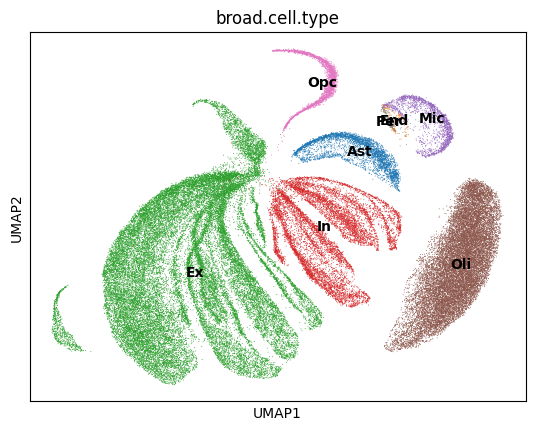

In [72]:
sc.pl.umap(filtered_mtx, color="broad.cell.type",legend_loc='on data')

C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


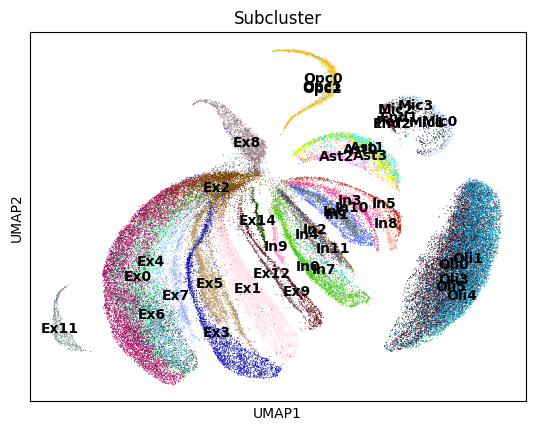

In [71]:
sc.pl.umap(filtered_mtx, color="Subcluster",legend_loc='on data')

In [76]:
filtered_mtx.obs['projid'] = filtered_mtx.obs.projid.astype('str')

C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


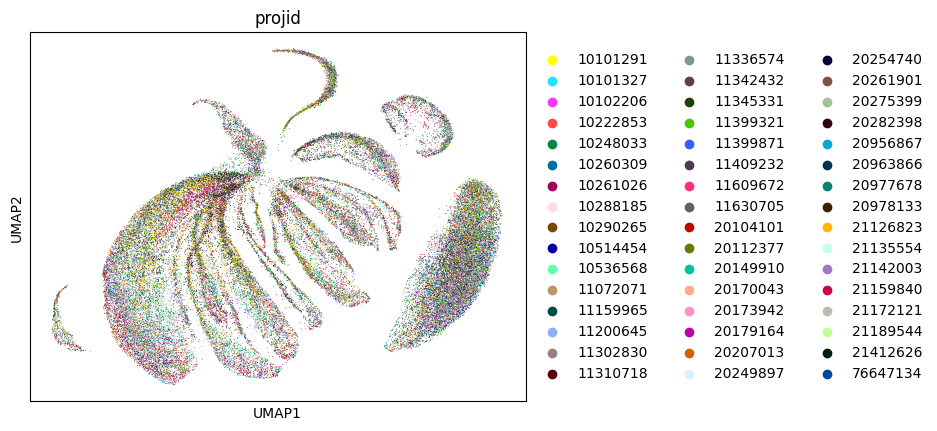

In [77]:
sc.pl.umap(filtered_mtx, color="projid")

In [10]:
meta_rnaseq.loc[(meta_rnaseq.braaksc<=2) &  (meta_rnaseq.ceradsc>=3) & (meta_rnaseq.cogdx<=2) & (meta_rnaseq.dcfdx_lv<=2),'stage']='NO_AD'

In [11]:
meta_rnaseq.loc[(meta_rnaseq.braaksc>=4) &  (meta_rnaseq.ceradsc<3) & (meta_rnaseq.cogdx>=4) & (meta_rnaseq.dcfdx_lv>=4),'stage'] = 'AD'

In [12]:
meta_rnaseq.stage.fillna(value='possible_AD',inplace=True)

In [90]:
meta_rnaseq.head()

projid Study  msex  educ  race  spanish  apoe_genotype   
25   20104101   ROS   0.0  18.0   1.0      2.0           23.0  \
272  20207013   ROS   0.0  23.0   1.0      2.0           23.0   
282  20170043   ROS   0.0  24.0   1.0      2.0           33.0   
616  20977678   ROS   0.0  16.0   1.0      2.0           23.0   
648  20149910   ROS   0.0  18.0   1.0      2.0           23.0   

     age_at_visit_max  age_first_ad_dx  age_death  cts_mmse30_first_ad_dx   
25               90.0        90.000000       90.0                    25.0  \
272              90.0              NaN       90.0                     NaN   
282              90.0        83.723477       90.0                    27.0   
616              90.0              NaN       90.0                     NaN   
648              90.0              NaN       90.0                     NaN   

     cts_mmse30_lv       pmi  braaksc  ceradsc  cogdx  dcfdx_lv individualID   
25             0.0  4.500000      2.0      3.0    4.0       4.0     R4567280  \
272           27.0  4.166667      1.0      4.0    1.0       1.0     R2880377   
282            0.0  4.250000      5.0      1.0    4.0       4.0     R9094222   
616            1.0  3.916667      3.0      4.0    2.0       2.0     R9113571   
648           27.0  3.250000      4.0      4.0    1.0       1.0     R3405776   

           stage  
25   possible_AD  
272        NO_AD  
282           AD  
616  possible_AD  
648  possible_AD

In [13]:
meta_rnaseq['projid'] = meta_rnaseq.projid.astype('str')

In [14]:
meta_rnaseq.to_csv('../cleaned_file/meta_rnaseq.csv')

In [98]:
merge_stage = filtered_mtx.obs[['projid']].merge(meta_rnaseq[['projid','stage']],how='left',on='projid').set_index(filtered_mtx.obs[['projid']].index)

In [99]:
filtered_mtx.obs['stage'] = merge_stage['stage']

C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


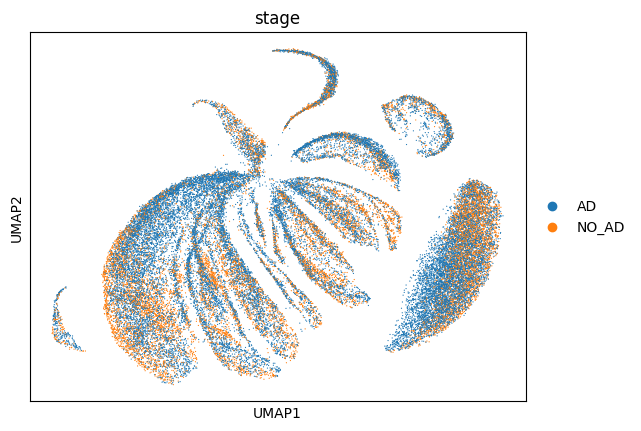

In [101]:
sc.pl.umap(filtered_mtx[filtered_mtx.obs.stage.isin(['NO_AD','AD'])], color="stage")

## try umap with normalization

In [103]:
filtered_mtx.layers['counts'] = filtered_mtx.X.copy()

In [104]:
sc.pp.normalize_total(filtered_mtx)

In [105]:
sc.pp.log1p(filtered_mtx)

In [106]:
filtered_mtx

AnnData object with n_obs × n_vars = 70634 × 17926
    obs: 'TAG', 'projid', 'pre.cluster', 'broad.cell.type', 'Subcluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_100_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'stage'
    var: 'gene_name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'pca', 'neighbors', 'umap', 'broad.cell.type_colors', 'Subcluster_colors', 'projid_colors', 'stage_colors', 'log1p'
    obsm: 'tsne', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [107]:
sc.pp.pca(filtered_mtx)
sc.pp.neighbors(filtered_mtx,use_rep="X_pca")
sc.tl.umap(filtered_mtx)

Note: re-calculate umap will overwrite previous results!!

C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


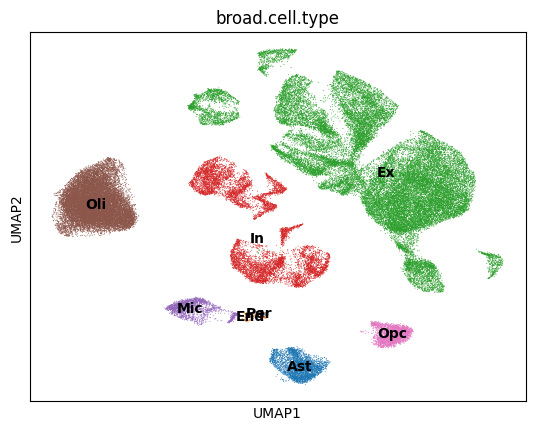

In [108]:
sc.pl.umap(filtered_mtx, color="broad.cell.type",legend_loc='on data')

In [109]:
filtered_mtx

AnnData object with n_obs × n_vars = 70634 × 17926
    obs: 'TAG', 'projid', 'pre.cluster', 'broad.cell.type', 'Subcluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_100_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'stage'
    var: 'gene_name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'pca', 'neighbors', 'umap', 'broad.cell.type_colors', 'Subcluster_colors', 'projid_colors', 'stage_colors', 'log1p'
    obsm: 'tsne', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


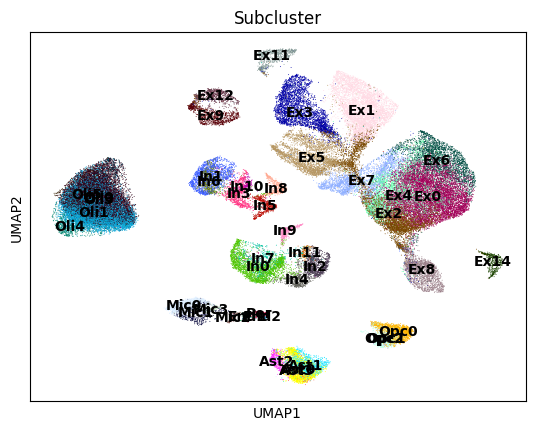

In [110]:
sc.pl.umap(filtered_mtx, color="Subcluster",legend_loc='on data')

C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


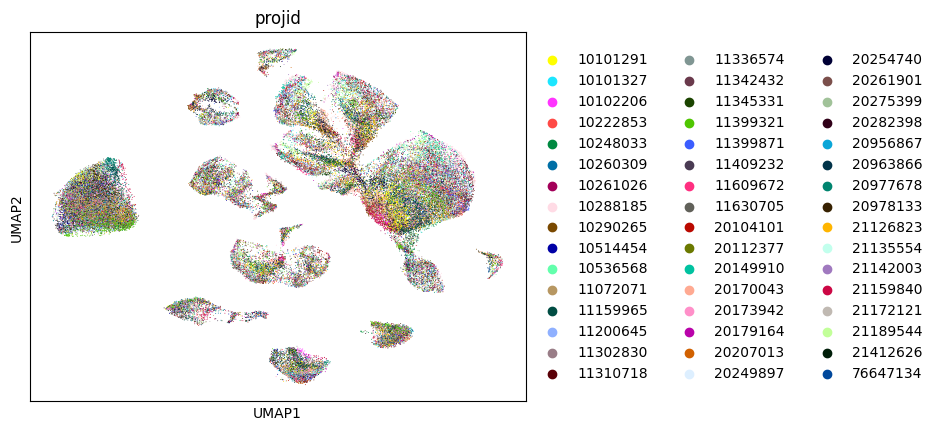

In [111]:
sc.pl.umap(filtered_mtx, color="projid")

C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


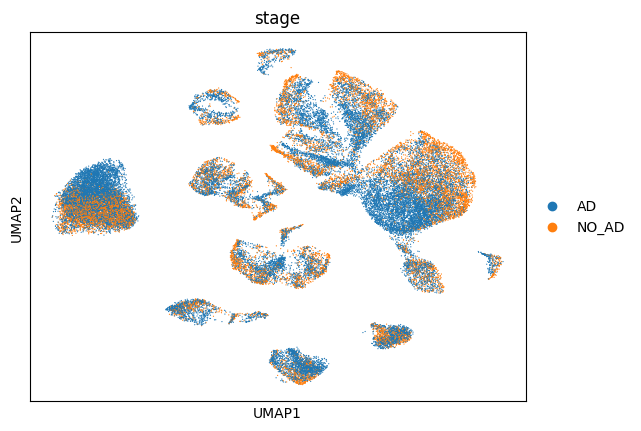

In [112]:
sc.pl.umap(filtered_mtx[filtered_mtx.obs.stage.isin(['NO_AD','AD'])], color="stage")

C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


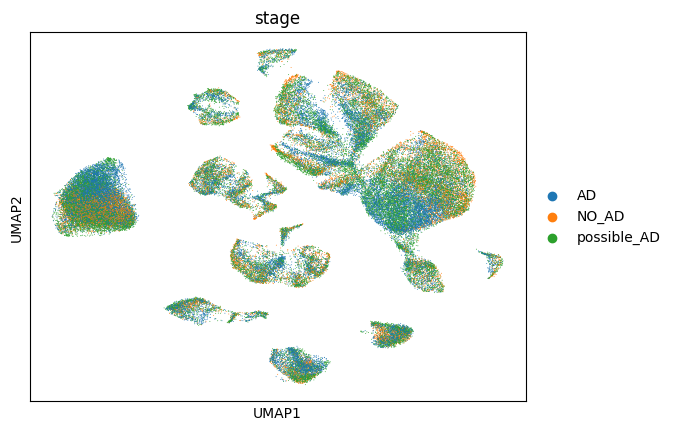

In [113]:
sc.pl.umap(filtered_mtx, color="stage")

In [114]:
filtered_mtx.layers['log1p_norm'] = filtered_mtx.X.copy()

### normalization before umap don't make large difference in seperating sub cell types
### donors are evenly distributed in umap
### can see some seperation between AD and NO_AD donor from umap

# feature selection

In [125]:
filtered_mtx.X = filtered_mtx.layers["counts"]

<Axes: xlabel='n_cells_by_counts', ylabel='Count'>

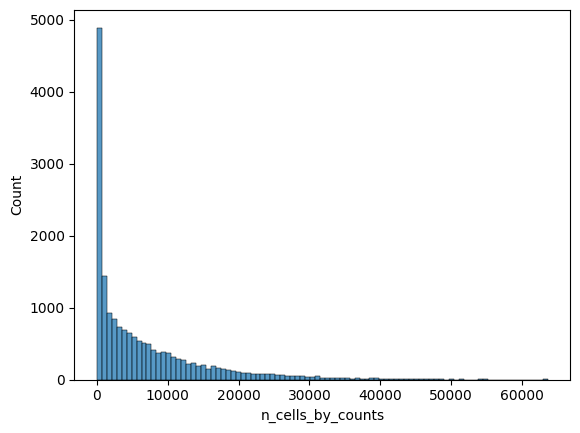

In [116]:
sns.histplot(filtered_mtx.var,x='n_cells_by_counts')

In [118]:
filtered_mtx.var

gene_name     mt  n_cells_by_counts  mean_counts   
Gene_0      FO538757.2  False              14778     0.266911  \
Gene_1          SAMD11  False                118     0.001699   
Gene_2           NOC2L  False               9000     0.153354   
Gene_3          KLHL17  False               1335     0.019495   
Gene_4         PLEKHN1  False                 17     0.000241   
...                ...    ...                ...          ...   
Gene_17921    C21orf58  False               1730     0.025399   
Gene_17922        PCNT  False              10969     0.196449   
Gene_17923       DIP2A  False              13896     0.260243   
Gene_17924       S100B  False               5536     0.102118   
Gene_17925       PRMT2  False              17339     0.336325   

            log1p_mean_counts  pct_dropout_by_counts  total_counts   
Gene_0               0.236582              79.078064       18853.0  \
Gene_1               0.001697              99.832942         120.0   
Gene_2               0.142674              87.258261       10832.0   
Gene_3               0.019307              98.109975        1377.0   
Gene_4               0.000241              99.975932          17.0   
...                       ...                    ...           ...   
Gene_17921           0.025081              97.550755        1794.0   
Gene_17922           0.179358              84.470652       13876.0   
Gene_17923           0.231305              80.326755       18382.0   
Gene_17924           0.097234              92.162415        7213.0   
Gene_17925           0.289924              75.452332       23756.0   

            log1p_total_counts  
Gene_0                9.844481  
Gene_1                4.795791  
Gene_2                9.290352  
Gene_3                7.228388  
Gene_4                2.890372  
...                        ...  
Gene_17921            7.492760  
Gene_17922            9.537988  
Gene_17923            9.819181  
Gene_17924            8.883779  
Gene_17925           10.075632  

[17926 rows x 8 columns]

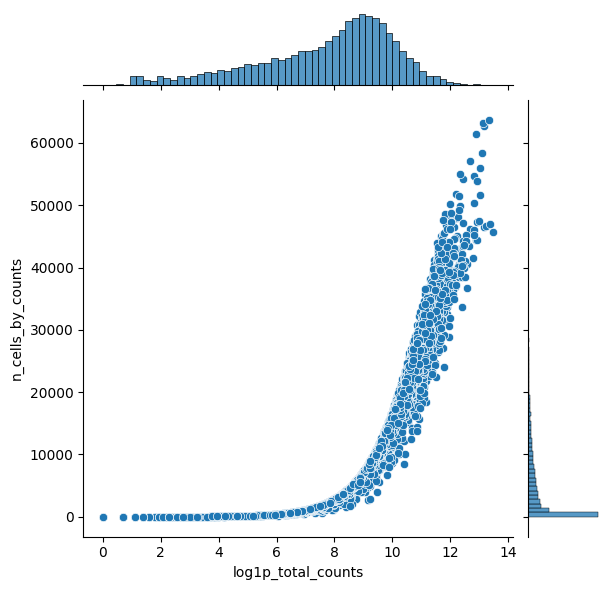

In [120]:
sns.jointplot(filtered_mtx.var,y='n_cells_by_counts',x='log1p_total_counts')

In [124]:
filtered_mtx.var[filtered_mtx.var.total_counts<=3].n_cells_by_counts.describe()

count    271.000000
mean       2.346863
std        0.670530
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: n_cells_by_counts, dtype: float64

In [126]:
filtered_mtx.var.shape

(17926, 8)

In [127]:
sc.pp.filter_genes(filtered_mtx, min_counts=3)

In [128]:
filtered_mtx.var.shape

(17780, 9)

In [129]:
scvi.data.poisson_gene_selection(filtered_mtx)

C:\Users\Daniel\anaconda3\envs\Finances\lib\abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)


Sampling from binomial...: 100%|██████████████████████████████████████████████| 10000/10000 [00:00<00:00, 24641.72it/s]


In [130]:
filtered_mtx.var

gene_name     mt  n_cells_by_counts  mean_counts   
Gene_0      FO538757.2  False              14778     0.266911  \
Gene_1          SAMD11  False                118     0.001699   
Gene_2           NOC2L  False               9000     0.153354   
Gene_3          KLHL17  False               1335     0.019495   
Gene_4         PLEKHN1  False                 17     0.000241   
...                ...    ...                ...          ...   
Gene_17921    C21orf58  False               1730     0.025399   
Gene_17922        PCNT  False              10969     0.196449   
Gene_17923       DIP2A  False              13896     0.260243   
Gene_17924       S100B  False               5536     0.102118   
Gene_17925       PRMT2  False              17339     0.336325   

            log1p_mean_counts  pct_dropout_by_counts  total_counts   
Gene_0               0.236582              79.078064       18853.0  \
Gene_1               0.001697              99.832942         120.0   
Gene_2               0.142674              87.258261       10832.0   
Gene_3               0.019307              98.109975        1377.0   
Gene_4               0.000241              99.975932          17.0   
...                       ...                    ...           ...   
Gene_17921           0.025081              97.550755        1794.0   
Gene_17922           0.179358              84.470652       13876.0   
Gene_17923           0.231305              80.326755       18382.0   
Gene_17924           0.097234              92.162415        7213.0   
Gene_17925           0.289924              75.452332       23756.0   

            log1p_total_counts  n_counts  highly_variable   
Gene_0                9.844481   18853.0             True  \
Gene_1                4.795791     120.0            False   
Gene_2                9.290352   10832.0            False   
Gene_3                7.228388    1377.0            False   
Gene_4                2.890372      17.0            False   
...                        ...       ...              ...   
Gene_17921            7.492760    1794.0            False   
Gene_17922            9.537988   13876.0            False   
Gene_17923            9.819181   18382.0             True   
Gene_17924            8.883779    7213.0            False   
Gene_17925           10.075632   23756.0             True   

            observed_fraction_zeros  expected_fraction_zeros   
Gene_0                     0.790781                 0.796570  \
Gene_1                     0.998329                 0.998305   
Gene_2                     0.872583                 0.870004   
Gene_3                     0.981100                 0.980941   
Gene_4                     0.999759                 0.999759   
...                             ...                      ...   
Gene_17921                 0.975508                 0.975336   
Gene_17922                 0.844707                 0.840289   
Gene_17923                 0.803268                 0.800475   
Gene_17924                 0.921624                 0.908799   
Gene_17925                 0.754523                 0.758460   

            prob_zero_enriched_nbatches  prob_zero_enrichment   
Gene_0                                1                0.1618  \
Gene_1                                0                0.0014   
Gene_2                                0                0.1096   
Gene_3                                0                0.0186   
Gene_4                                0                0.0002   
...                                 ...                   ...   
Gene_17921                            0                0.0215   
Gene_17922                            0                0.1363   
Gene_17923                            1                0.1597   
Gene_17924                            0                0.0866   
Gene_17925                            1                0.1800   

            prob_zero_enrichment_rank  
Gene_0                        14770.0  
Gene_1                      

In [131]:
selected = filtered_mtx[:, filtered_mtx.var["highly_variable"]].copy()

In [132]:
selected

AnnData object with n_obs × n_vars = 70634 × 4000
    obs: 'TAG', 'projid', 'pre.cluster', 'broad.cell.type', 'Subcluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_100_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'stage'
    var: 'gene_name', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts', 'highly_variable', 'observed_fraction_zeros', 'expected_fraction_zeros', 'prob_zero_enriched_nbatches', 'prob_zero_enrichment', 'prob_zero_enrichment_rank'
    uns: 'pca', 'neighbors', 'umap', 'broad.cell.type_colors', 'Subcluster_colors', 'projid_colors', 'stage_colors', 'log1p', 'hvg'
    obsm: 'tsne', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'log1p_norm'
    obsp: 'distances', 'connectivities'

In [133]:
selected.write("../cleaned_file/selected_data.h5ad", compression="gzip")

# scVi

In [15]:
selected = sc.read_h5ad('../cleaned_file/selected_data.h5ad')

In [17]:
meta_rnaseq.head()

projid Study  msex  educ  race  spanish  apoe_genotype   
25   20104101   ROS   0.0  18.0   1.0      2.0           23.0  \
272  20207013   ROS   0.0  23.0   1.0      2.0           23.0   
282  20170043   ROS   0.0  24.0   1.0      2.0           33.0   
616  20977678   ROS   0.0  16.0   1.0      2.0           23.0   
648  20149910   ROS   0.0  18.0   1.0      2.0           23.0   

     age_at_visit_max  age_first_ad_dx  age_death  cts_mmse30_first_ad_dx   
25               90.0        90.000000       90.0                    25.0  \
272              90.0              NaN       90.0                     NaN   
282              90.0        83.723477       90.0                    27.0   
616              90.0              NaN       90.0                     NaN   
648              90.0              NaN       90.0                     NaN   

     cts_mmse30_lv       pmi  braaksc  ceradsc  cogdx  dcfdx_lv individualID   
25             0.0  4.500000      2.0      3.0    4.0       4.0     R4567280  \
272           27.0  4.166667      1.0      4.0    1.0       1.0     R2880377   
282            0.0  4.250000      5.0      1.0    4.0       4.0     R9094222   
616            1.0  3.916667      3.0      4.0    2.0       2.0     R9113571   
648           27.0  3.250000      4.0      4.0    1.0       1.0     R3405776   

           stage  
25   possible_AD  
272        NO_AD  
282           AD  
616  possible_AD  
648  possible_AD

In [20]:
selected.layers['counts'] = selected.layers['counts'].tocsr()

In [21]:
scvi.model.SCVI.setup_anndata(
    selected, layer="counts"
)  # prepare data for scVI

C:\Users\Daniel\anaconda3\envs\Finances\lib\abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)


In [22]:
model = scvi.model.SCVI(selected) # ZINB distribution


In [23]:
model.train(
    check_val_every_n_epoch=1,
    max_epochs=400,
    early_stopping=True,
    early_stopping_patience=20,
    early_stopping_monitor="elbo_validation",
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/400:   0%|                                                                             | 0/400 [00:00<?, ?it/s]

C:\Users\Daniel\anaconda3\envs\Finances\lib\abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)


Epoch 400/400: 100%|█████| 400/400 [25:26<00:00,  3.85s/it, v_num=1, train_loss_step=2.63e+3, train_loss_epoch=2.69e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████| 400/400 [25:26<00:00,  3.82s/it, v_num=1, train_loss_step=2.63e+3, train_loss_epoch=2.69e+3]


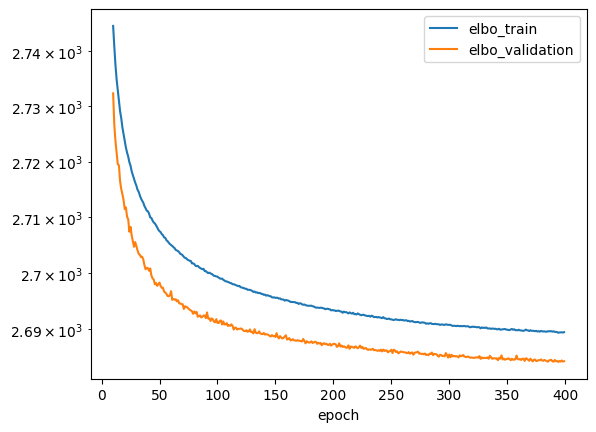

In [24]:
train_test_results = model.history["elbo_train"]
train_test_results["elbo_validation"] = model.history["elbo_validation"]
train_test_results.iloc[10:].plot(logy=True)  # exclude first 10 epochs
plt.show()

## latent space

C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


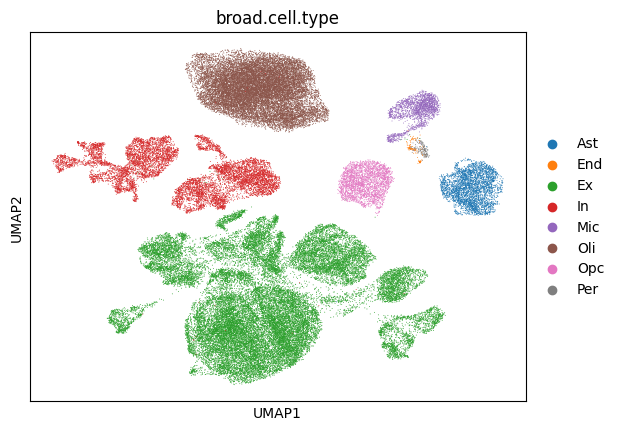

In [26]:
SCVI_LATENT_KEY = "X_scVI"

latent = model.get_latent_representation()
selected.obsm[SCVI_LATENT_KEY] = latent
sc.pp.neighbors(selected, use_rep=SCVI_LATENT_KEY)
sc.tl.umap(selected)


C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


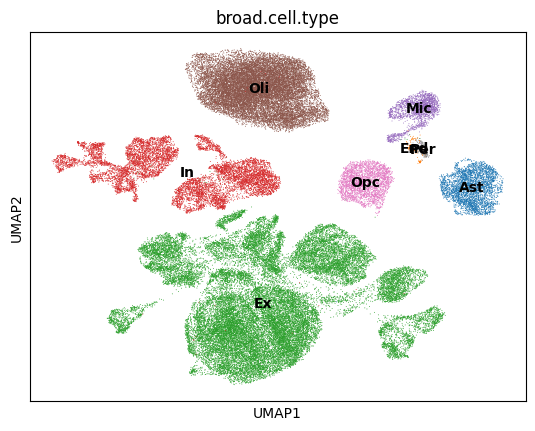

In [27]:
sc.pl.umap(selected, color="broad.cell.type",legend_loc='on data')

C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


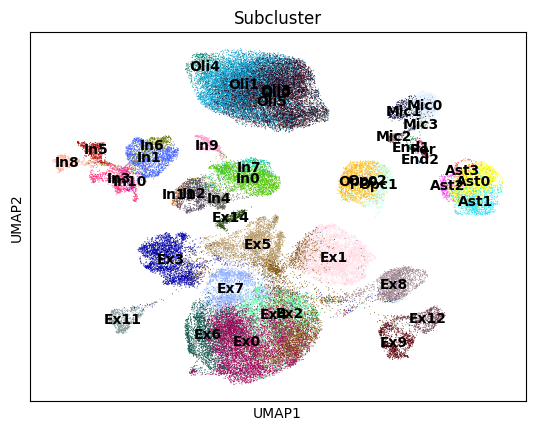

In [28]:
sc.pl.umap(selected, color="Subcluster",legend_loc='on data')

C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


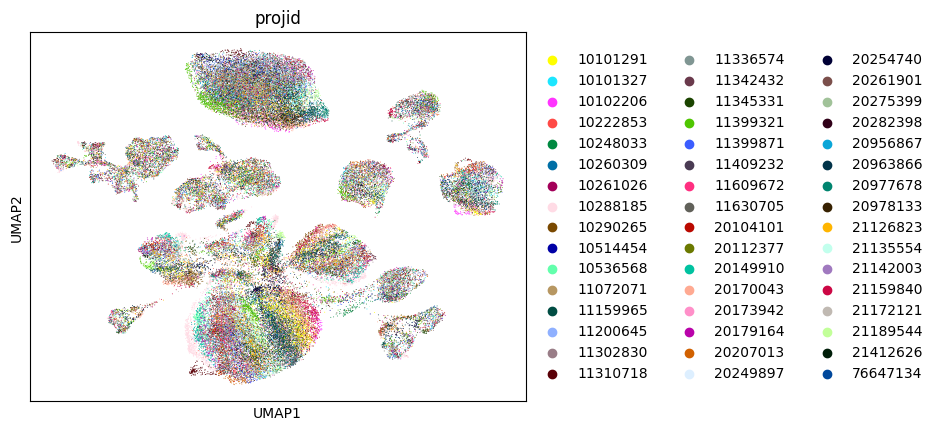

In [30]:
sc.pl.umap(selected, color="projid")

C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


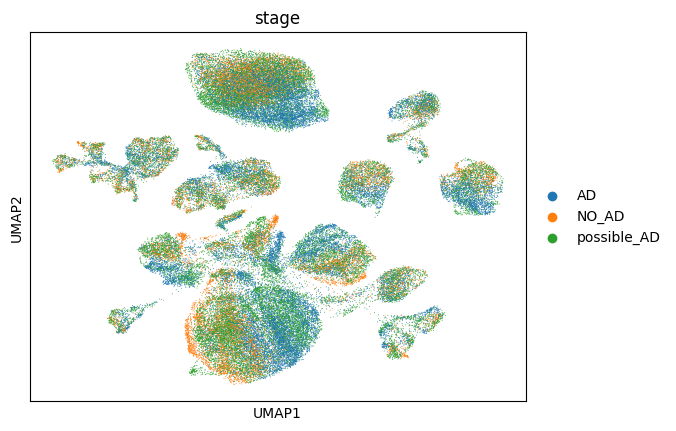

In [32]:
sc.pl.umap(selected, color="stage")

C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


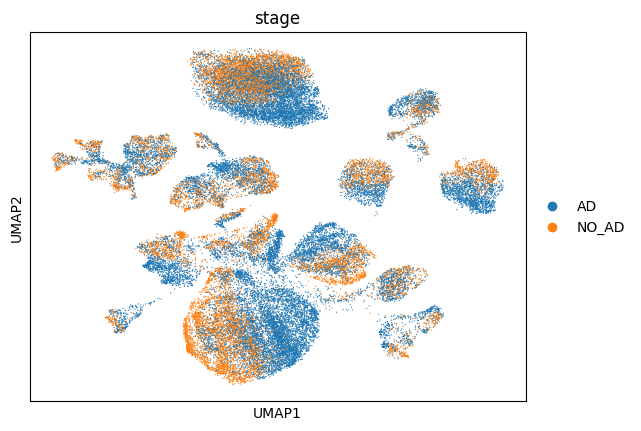

In [33]:
sc.pl.umap(selected[selected.obs.stage.isin(['NO_AD','AD'])], color="stage")

### AD and NO_AD are seperated in the UMAP that is created from the trained latent space

## differential expression 

In [34]:
cell_idx1 = selected.obs.stage=='AD'
cell_idx2 = selected.obs.stage=='NO_AD'

In [48]:
de_change = model.differential_expression(idx1=cell_idx1, idx2=cell_idx2,delta=0.2,fdr_target=0.05)

DE...: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.89s/it]


In [50]:
de_change[de_change['is_de_fdr_0.05']].shape

(26, 19)

In [41]:
de_change.shape

(4000, 19)

In [51]:
de_change.head()

proba_de  proba_not_de  bayes_factor    scale1    scale2   
Gene_2584    0.9622        0.0378      3.236913  0.000084  0.000068  \
Gene_8595    0.9606        0.0394      3.193792  0.000213  0.000193   
Gene_2811    0.9532        0.0468      3.013941  0.000119  0.000102   
Gene_8286    0.9530        0.0470      3.009467  0.000316  0.000474   
Gene_4609    0.9530        0.0470      3.009467  0.000269  0.000264   

           pseudocounts  delta  lfc_mean  lfc_median   lfc_std    lfc_min   
Gene_2584           0.0    0.2  0.398988    0.433288  4.219625 -13.566654  \
Gene_8595           0.0    0.2  0.016731    0.071476  3.398983 -10.513518   
Gene_2811           0.0    0.2  0.204130    0.156595  3.179719  -8.381030   
Gene_8286           0.0    0.2 -0.557922   -0.559105  2.734596  -8.204622   
Gene_4609           0.0    0.2  0.085275    0.094510  3.019579  -9.521015   

             lfc_max  raw_mean1  raw_mean2  non_zeros_proportion1   
Gene_2584  12.392728   0.151852   0.202848               0.097860  \
Gene_8595   9.621443   0.364588   0.441128               0.165558   
Gene_2811   9.019999   0.220626   0.245607               0.119855   
Gene_8286   7.218958   1.126819   1.724623               0.305535   
Gene_4609   8.612355   0.511931   0.621734               0.220983   

           non_zeros_proportion2  raw_normalized_mean1  raw_normalized_mean2   
Gene_2584               0.123004              0.630316              0.543337  \
Gene_8595               0.188465              1.989229              1.678863   
Gene_2811               0.141877              0.925701              0.846813   
Gene_8286               0.426026              3.260038              4.934351   
Gene_4609               0.252277              2.458716              2.513066   

           is_de_fdr_0.05  
Gene_2584            True  
Gene_8595            True  
Gene_2811            True  
Gene_8286            True  
Gene_4609            True

In [54]:
de_change[de_change.proba_de>0.92].shape

(363, 19)

In [63]:
subcluster_count = selected.obs.Subcluster.value_counts().reset_index()

In [75]:
sum(selected.obs['Subcluster'].isin(subcluster_count.loc[subcluster_count['count']>500,'Subcluster']))

67855

In [61]:
markers = de_change[de_change.proba_de>0.92].index

In [78]:
markers = de_change[de_change['is_de_fdr_0.05']].index

In [80]:
cell_marker = (selected.obs['Subcluster'].isin(subcluster_count.loc[subcluster_count['count']>500,'Subcluster']))\
                & (selected.obs['stage'].isin(['NO_AD','AD']))

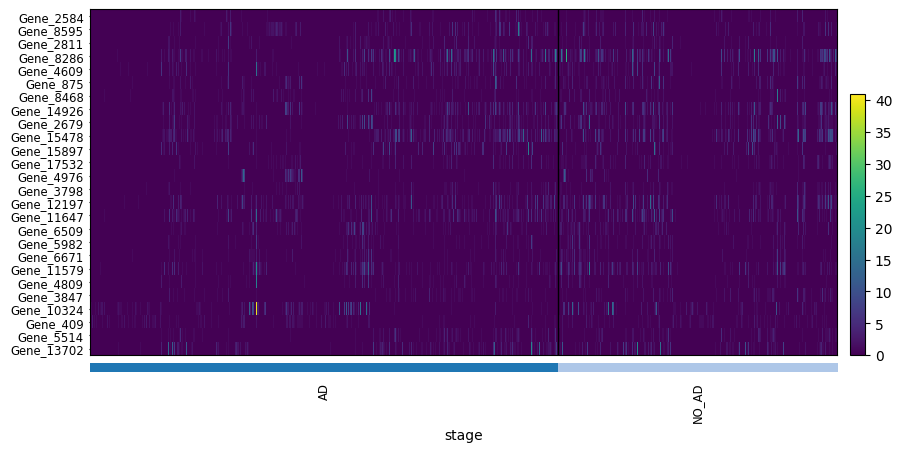

In [92]:
 sc.pl.heatmap(
        selected[cell_marker].copy(),
        var_names=markers,
        groupby=['stage'],
        swap_axes=True)

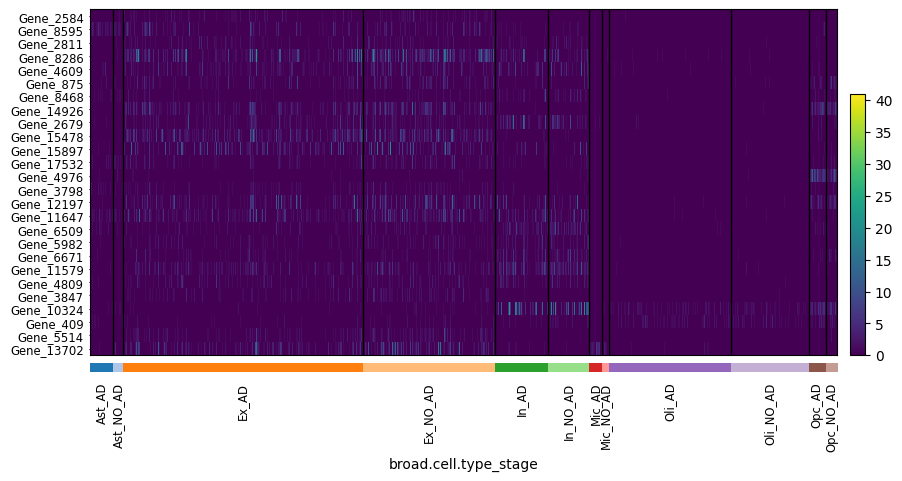

In [82]:
 sc.pl.heatmap(
        selected[cell_marker].copy(),
        var_names=markers,
        groupby=['broad.cell.type','stage'],
        swap_axes=True)

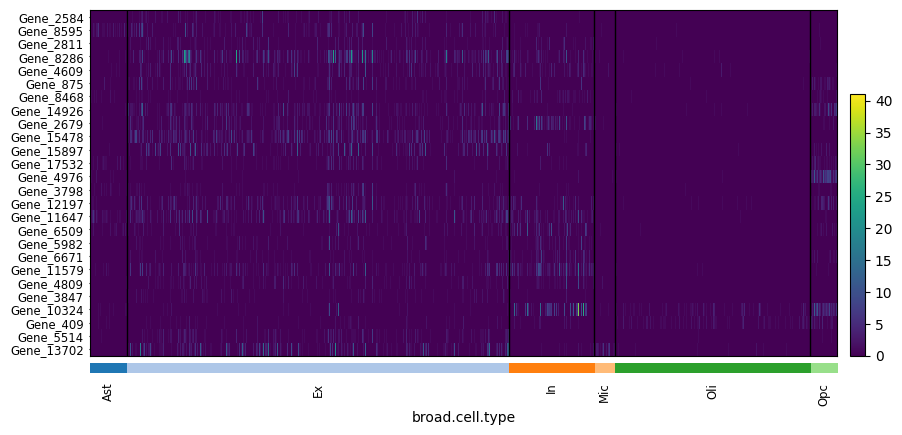

In [83]:
 sc.pl.heatmap(
        selected[(cell_marker) & (selected.obs['stage']=='AD')].copy(),
        var_names=markers,
        groupby=['broad.cell.type'],
        swap_axes=True)

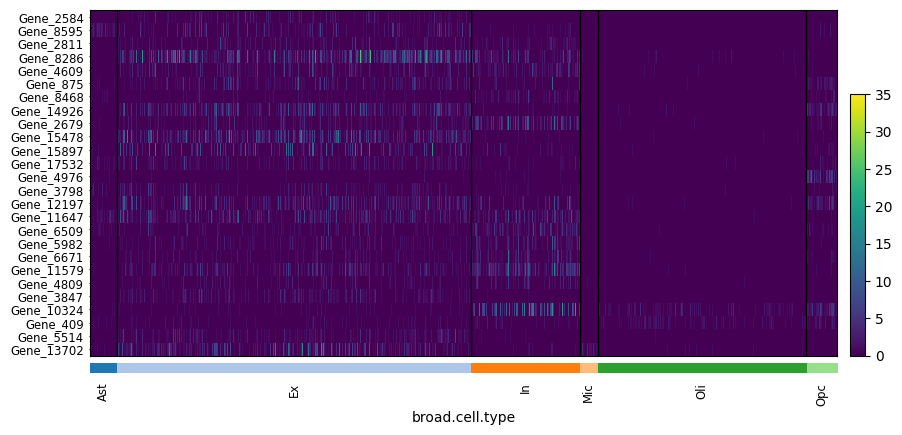

In [84]:
 sc.pl.heatmap(
        selected[(cell_marker) & (selected.obs['stage']=='NO_AD')].copy(),
        var_names=markers,
        groupby=['broad.cell.type'],
        swap_axes=True)

In [85]:
cell_marker2 = selected.obs['broad.cell.type'].isin(['Ast','Ex','In'])

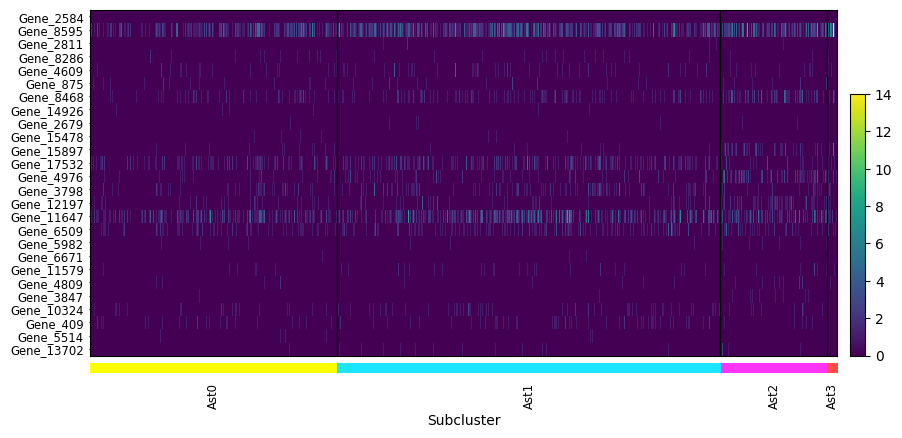

In [90]:
 sc.pl.heatmap(
        selected[(cell_marker2) & (selected.obs['stage']=='AD') & (selected.obs['broad.cell.type']=='Ast')].copy(),
        var_names=markers,
        groupby='Subcluster',
        swap_axes=True,
)

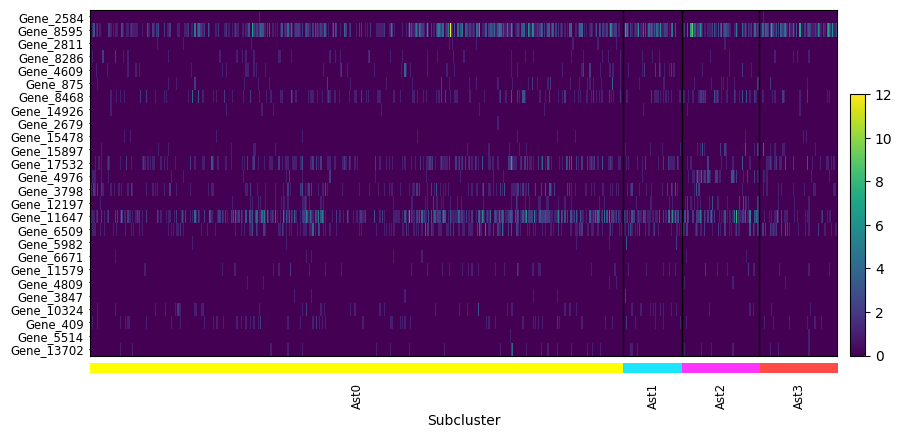

In [91]:
 sc.pl.heatmap(
        selected[(cell_marker2) & (selected.obs['stage']=='NO_AD') & (selected.obs['broad.cell.type']=='Ast')].copy(),
        var_names=markers,
        groupby='Subcluster',
        swap_axes=True,
)

### didn't see obvious differential gene expressions between AD and NO_AD within each cell type
### cell type migration may be more related to donor CPS, instead of gene expression change within each cell type

C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


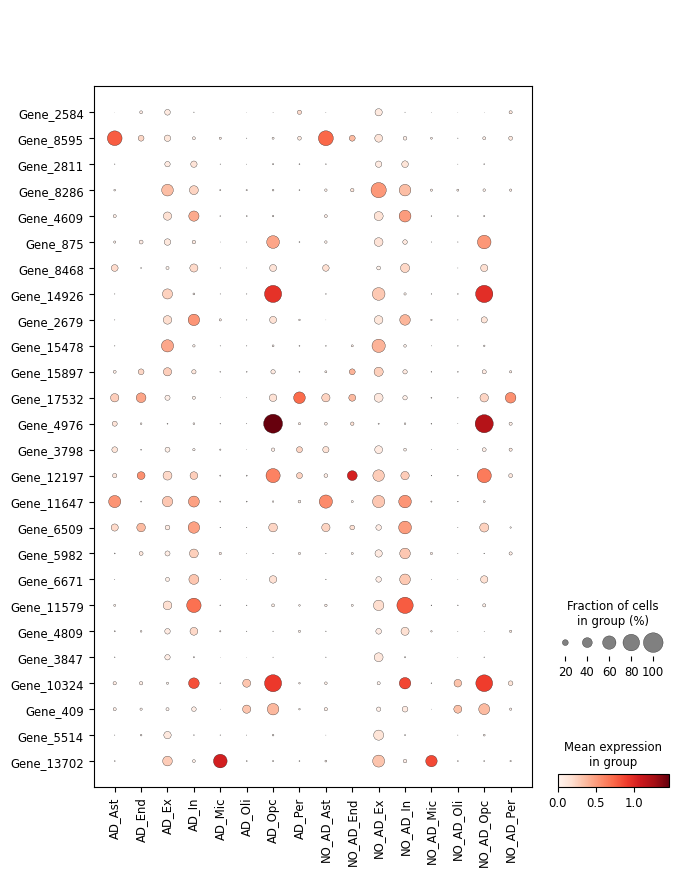

In [98]:
sc.pl.dotplot(selected[selected.obs['stage'].isin(['NO_AD','AD'])], markers, layer='log1p_norm',groupby=['stage','broad.cell.type'],swap_axes=True)

C:\Users\Daniel\anaconda3\envs\Finances\lib\site-packages\scanpy\plotting\_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


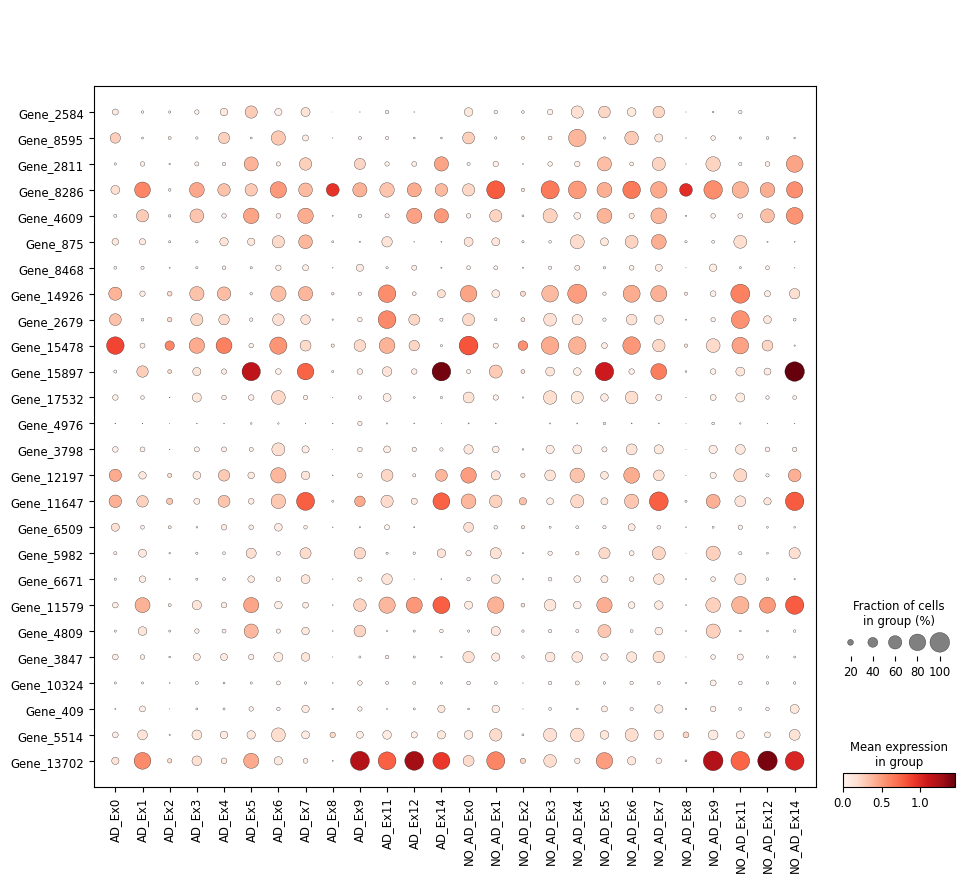

In [100]:
sc.pl.dotplot(selected[(selected.obs['stage'].isin(['NO_AD','AD'])) &  (selected.obs['broad.cell.type']=='Ex')], 
              markers, layer='log1p_norm',groupby=['stage','Subcluster'],swap_axes=True)